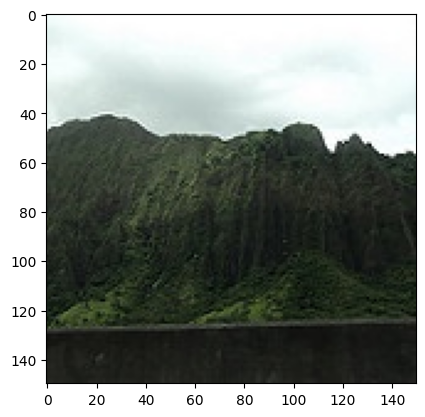

In [1]:
import matplotlib.pyplot as plt
import os
intel_ds = os.path.join('/kaggle/input/intel-image-classification/seg_train/seg_train')
first = os.path.join(intel_ds,os.listdir(intel_ds)[0])
imgs = os.path.join(intel_ds,os.listdir(intel_ds)[0],os.listdir(first)[5])
img_arr = plt.imread(imgs)
plt.imshow(img_arr)

In [2]:
from PIL import Image
from torch.utils.data import Dataset , DataLoader
import torchvision.transforms as transforms

class IntelDataset(Dataset):
  def __init__(self,data_paths,label_path,is_train):
    super().__init__()
    self.dataset = data_paths
    self.labels = label_path
    normalize_mean = [0.485, 0.456, 0.406]
    normalize_std = [0.229, 0.224, 0.225]
    if is_train:
      self.transform = transforms.Compose([
          transforms.Resize((128,128)),
          transforms.RandomCrop(124),
        
         
          transforms.ToTensor(),
          transforms.Normalize(mean=normalize_mean,std=normalize_std)

      ])
    else:
      self.transform = transforms.Compose([

          transforms.Resize((128,128)),
          transforms.ToTensor(),
          transforms.Normalize(mean=normalize_mean,std=normalize_std)

      ])
  def __getitem__(self, idx):
    img = self.dataset[idx]
    label = self.labels[idx]
    img = Image.open(img)
    img_transformed = self.transform(img)
    return img_transformed,label
  def __len__(self):
    return len(self.dataset)

In [3]:
intel_ds = os.path.join('/kaggle/input/intel-image-classification/seg_train/seg_train')
first = os.path.join(intel_ds,os.listdir(intel_ds)[0])
imgs = os.path.join(intel_ds,os.listdir(intel_ds)[0],os.listdir(first)[5])
img_arr = plt.imread(imgs)

In [4]:
classes_to_int = {
"glacier":0,
"sea":1,
"street":2,
"forest":3,
"buildings":4,
"mountain":5,
}
int_to_classes = ["glacier",
"sea",
"street",
"forest",
"buildings",
"mountain"]
num_classes = 6

In [5]:
img_paths = []
labels = []
for img_dir in os.listdir(intel_ds):
  img_dirs = os.path.join(intel_ds,img_dir)
  for img in os.listdir(img_dirs):
    img_paths.append(os.path.join(img_dirs,img))
    labels.append(classes_to_int[img_dir])






In [6]:
len(img_paths)

14034

In [7]:
from sklearn.utils import shuffle
img_paths,labels = shuffle(img_paths,labels,random_state = 42)


In [8]:
# train_ratio = 0.85
# test_ratio = 0.1
# valid_ratio = 1-train_ratio-test_ratio
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(
     img_paths, labels, test_size=0.2, random_state=42)

X_test, X_valid, y_test, y_valid = ms.train_test_split(
     X_test, y_test, train_size=0.75, random_state=42)




In [12]:
import cv2
img= cv2.imread(X_test[0])

In [31]:
R1=img[:][:][]

In [29]:
R1.shape

(150, 3)

In [21]:
R1

array([[181, 141,  92],
       [182, 142,  93],
       [183, 143,  94],
       [183, 143,  94],
       [183, 143,  94],
       [183, 143,  94],
       [184, 144,  95],
       [185, 145,  96],
       [186, 146,  98],
       [186, 146,  98],
       [187, 147,  99],
       [187, 147,  99],
       [187, 147,  99],
       [187, 147,  99],
       [187, 147,  99],
       [187, 147,  98],
       [189, 148,  99],
       [189, 149,  97],
       [189, 149, 100],
       [189, 149, 100],
       [190, 150, 101],
       [190, 150, 101],
       [191, 151, 103],
       [191, 151, 103],
       [191, 151, 103],
       [192, 152, 104],
       [193, 153, 105],
       [194, 154, 106],
       [193, 153, 105],
       [194, 154, 106],
       [196, 155, 106],
       [196, 156, 107],
       [196, 156, 107],
       [194, 157, 107],
       [193, 156, 106],
       [193, 156, 106],
       [194, 157, 107],
       [195, 158, 108],
       [196, 159, 109],
       [197, 160, 110],
       [197, 160, 110],
       [198, 161

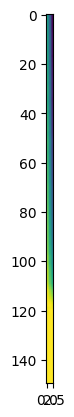

In [20]:
plt.imshow(R1)

In [47]:
train_ds = IntelDataset(X_train,y_train,is_train=True)
test_ds = IntelDataset(X_test,y_test,is_train=False)
valid_ds = IntelDataset(X_valid,y_valid,is_train=False)


In [48]:
test_loader = DataLoader(test_ds,batch_size=64,shuffle=False,drop_last=False)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_ds, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3785625].


Text(0.5, 1.0, 'buildings')

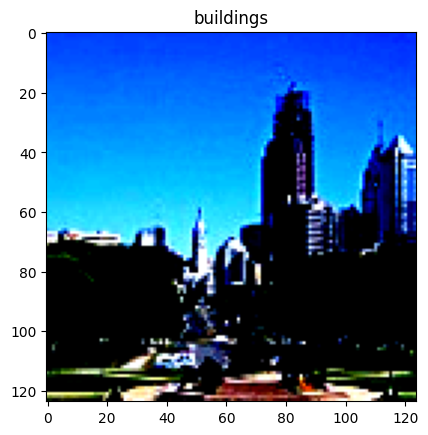

In [49]:
img = next(iter(train_loader))
plt.imshow(img[0][6].permute(1,2,0))
plt.title(int_to_classes[img[1][6]])

In [50]:
from torch import nn
class IntelModel(nn.Module):
  def __init__(self,) :
    super().__init__()
    self.features = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,stride=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.2),

        nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.2),

        nn.Conv2d(in_channels=128,out_channels=512,kernel_size=3,stride=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.2),

        nn.Conv2d(in_channels=512,out_channels=1024,kernel_size=3,stride=1),
        nn.BatchNorm2d(1024),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.2),

        
    )
    self.gap = nn.AdaptiveAvgPool2d((1,1))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512,num_classes)
    )
  def forward(self,x):
    x = self.features(x)
    x = self.gap(x)
    x = self.classifier(x)
    return x


    

In [51]:
model = IntelModel()


In [52]:
from tqdm import tqdm
import torch

epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(epochs):
    # ---------- TRAIN ----------
    model.train()
    total_loss = 0
    correct = 0

    loop = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}')
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate for epoch stats
        total_loss += loss.item()        # batch-average loss
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()

        # show running average per batch
        loop.set_postfix(
            loss=f'{total_loss/(loop.n + 1):.4f}',  # average over batches seen so far
            acc=f'{100*correct/((loop.n + 1)*train_loader.batch_size):.2f}%'
        )

    print(f"Train | Acc: {100*correct/(len(train_loader)*train_loader.batch_size):.2f}% | "
          f"Loss: {total_loss/len(train_loader):.4f}")

    # ---------- VALIDATION ----------
    model.eval()
    total_loss_val = 0
    correct_val = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss_val += loss.item()
            preds = outputs.argmax(dim=1)
            correct_val += (preds == labels).sum().item()

    print(f"Valid | Acc: {100*correct_val/(len(valid_loader)*valid_loader.batch_size):.2f}% | "
          f"Loss: {total_loss_val/len(valid_loader):.4f}")


Epoch 1/20: 100%|██████████| 176/176 [00:22<00:00,  7.84it/s, acc=46.48%, loss=1.4818]

Train | Acc: 46.48% | Loss: 1.4818


Valid | Acc: 50.71% | Loss: 1.1889


Epoch 2/20: 100%|██████████| 176/176 [00:23<00:00,  7.64it/s, acc=56.56%, loss=1.0538]

Train | Acc: 56.56% | Loss: 1.0538


Valid | Acc: 52.98% | Loss: 1.0563


Epoch 3/20: 100%|██████████| 176/176 [00:22<00:00,  7.80it/s, acc=64.35%, loss=0.9306]

Train | Acc: 64.35% | Loss: 0.9306


Valid | Acc: 68.18% | Loss: 0.8611


Epoch 4/20: 100%|██████████| 176/176 [00:22<00:00,  7.85it/s, acc=69.14%, loss=0.8245]

Train | Acc: 69.14% | Loss: 0.8245


Valid | Acc: 71.31% | Loss: 0.7823


Epoch 5/20: 100%|██████████| 176/176 [00:22<00:00,  7.80it/s, acc=72.74%, loss=0.7555]

Train | Acc: 72.74% | Loss: 0.7555


Valid | Acc: 78.12% | Loss: 0.6489


Epoch 6/20: 100%|██████████| 176/176 [00:22<00:00,  7.78it/s, acc=74.56%, loss=0.7027]

Train | Acc: 74.56% | Loss: 0.7027


Valid | Acc: 77.13% | Loss: 0.6047


Epoch 7/20: 100%|██████████| 176/176 [00:22<00:00,  7.80it/s, acc=76.62%, loss=0.6407]

Train | Acc: 76.62% | Loss: 0.6407


Valid | Acc: 76.99% | Loss: 0.6549


Epoch 8/20: 100%|██████████| 176/176 [00:22<00:00,  7.82it/s, acc=78.52%, loss=0.6021]

Train | Acc: 78.52% | Loss: 0.6021


Valid | Acc: 82.81% | Loss: 0.4818


Epoch 9/20: 100%|██████████| 176/176 [00:22<00:00,  7.81it/s, acc=78.85%, loss=0.5840]

Train | Acc: 78.85% | Loss: 0.5840


Valid | Acc: 78.98% | Loss: 0.6151


Epoch 10/20: 100%|██████████| 176/176 [00:22<00:00,  7.80it/s, acc=79.76%, loss=0.5680]

Train | Acc: 79.76% | Loss: 0.5680


Valid | Acc: 82.39% | Loss: 0.4916


Epoch 11/20: 100%|██████████| 176/176 [00:22<00:00,  7.79it/s, acc=81.20%, loss=0.5338]

Train | Acc: 81.20% | Loss: 0.5338


Valid | Acc: 82.67% | Loss: 0.4975


Epoch 12/20: 100%|██████████| 176/176 [00:22<00:00,  7.79it/s, acc=81.98%, loss=0.5130]

Train | Acc: 81.98% | Loss: 0.5130


Valid | Acc: 81.82% | Loss: 0.5247


Epoch 13/20: 100%|██████████| 176/176 [00:22<00:00,  7.79it/s, acc=82.37%, loss=0.4910]

Train | Acc: 82.37% | Loss: 0.4910


Valid | Acc: 82.39% | Loss: 0.4793


Epoch 14/20: 100%|██████████| 176/176 [00:22<00:00,  7.79it/s, acc=83.42%, loss=0.4729]

Train | Acc: 83.42% | Loss: 0.4729


Valid | Acc: 82.24% | Loss: 0.5250


Epoch 15/20: 100%|██████████| 176/176 [00:22<00:00,  7.80it/s, acc=84.14%, loss=0.4510]

Train | Acc: 84.14% | Loss: 0.4510


Valid | Acc: 87.22% | Loss: 0.4002


Epoch 16/20: 100%|██████████| 176/176 [00:22<00:00,  7.81it/s, acc=83.91%, loss=0.4401]

Train | Acc: 83.91% | Loss: 0.4401


Valid | Acc: 81.39% | Loss: 0.5099


Epoch 17/20: 100%|██████████| 176/176 [00:22<00:00,  7.81it/s, acc=84.59%, loss=0.4327]

Train | Acc: 84.59% | Loss: 0.4327


Valid | Acc: 78.55% | Loss: 0.6563


Epoch 18/20: 100%|██████████| 176/176 [00:22<00:00,  7.81it/s, acc=84.64%, loss=0.4373]

Train | Acc: 84.64% | Loss: 0.4373


Valid | Acc: 78.69% | Loss: 0.5730


Epoch 19/20: 100%|██████████| 176/176 [00:22<00:00,  7.82it/s, acc=85.33%, loss=0.4005]

Train | Acc: 85.33% | Loss: 0.4005


Valid | Acc: 81.82% | Loss: 0.5582


Epoch 20/20: 100%|██████████| 176/176 [00:22<00:00,  7.82it/s, acc=85.73%, loss=0.4037]

Train | Acc: 85.73% | Loss: 0.4037


Valid | Acc: 84.66% | Loss: 0.4637


In [53]:
model.eval()
total_loss_test = 0
correct_test = 0
total_test_samples = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        loss = criterion(outputs, labels)

        batch_size = labels.size(0)
        total_loss_test += loss.item() * batch_size
        total_test_samples += batch_size

        preds = outputs.argmax(dim=1)
        correct_test += (preds == labels).sum().item()

print(f"Test | Acc: {100*correct_test/total_test_samples:.2f}% | "
      f"Loss: {total_loss_test/total_test_samples:.4f}")

Test | Acc: 84.47% | Loss: 0.4404


In [58]:
os.mkdir('/kaggle/working/')


In [62]:
torch.save(model,'/kaggle/working/intel.pt')